# Assignment 10: Dimensionality Reduction

Dataset(s) needed: MNIST ("Modified National Institute of Standards and Technology") dataset.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns 

#Load the MNIST dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
y = pd.Series(mnist.target).astype('int').astype('category')
X = StandardScaler().fit_transform(mnist.data)
X = pd.DataFrame(X)

y.head()

X.head()

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


In [43]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 418.7 MB


#### Q.1. Split the data into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [44]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 12117 to 57913
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7228 to 55182
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 59.9 MB


#### Q.2. Train a Logistic Regression classifier on the dataset and see how long it takes.

In [45]:
from sklearn.linear_model import LogisticRegression
from time import time

log_clf = LogisticRegression(random_state=0, solver='sag')
start_time = time()
log_clf.fit(X_train, y_train)
end_time = time()

print("Training took {:.2f}s".format(end_time - start_time))

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training took 340.24s


#### Q.3. Evaluate the resulting model on the test set.

In [46]:
y_predict = log_clf.predict(X_test)
score = log_clf.score(X_test, y_test)
print(score)

0.9073


In [47]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 942    1    2    0    3    4   10    3    8    2]
 [   0 1145    3    1    2    7    1    1   12    0]
 [   7   16  875   19   13    2   23   14   19    3]
 [   8    7   22  920    3   30    6   14   25    9]
 [   2    5    8    0  926    3    6    2   13   31]
 [  21    9    7   29   13  785   26    7   25    8]
 [   4    4    6    0   12   12  945    0   11    1]
 [   8   12   14    6   14    1    0  944    0   26]
 [   6   42    7   26   13   30   10    7  772   15]
 [   8    7    1   21   44    5    0   36    3  819]]


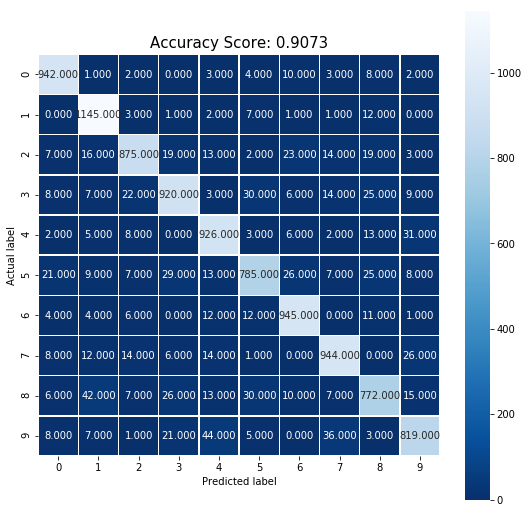

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Q.4. Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [49]:

from sklearn.decomposition import PCA

pca = PCA(n_components=340)
principalComponents = pca.fit_transform(X)

info = pca.explained_variance_ratio_.sum()
print(info)


0.9522602413720695


In [50]:
type(principalComponents)
len(principalComponents[0])

340

In [51]:
from sklearn.linear_model import LogisticRegression
from time import time

X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=10000)
log_clf = LogisticRegression(random_state=0, solver='sag')
start_time = time()
log_clf.fit(X_train, y_train)
end_time = time()

print("Training took {:.2f}s".format(end_time - start_time))

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training took 166.41s


#### Q.5. Train a new Logistic Regression classifier on the reduced dataset and see how long it takes. Was training much faster? Explain your results

In [52]:
y_predict = log_clf.predict(X_test)
score = log_clf.score(X_test, y_test)
print(score)

0.9058


In [53]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 974    3    1    1    3    4    7    0    8    0]
 [   0 1125    7    6    0    6    1    1   20    1]
 [   5   16  867   15   14    1    8   13   33    5]
 [   6    8   28  882    6   40    6   17   17   14]
 [   1   15    2    1  889    3    7    7    8   33]
 [  17    8    3   36   11  775   16    3   14   13]
 [   7    5    7    1    7   13  964    3   11    0]
 [   5   19   11    3   14    1    2  966    1   30]
 [   4   46    8   20   15   30    9    6  800   24]
 [   8    7    2   16   40    7    0   37    4  816]]


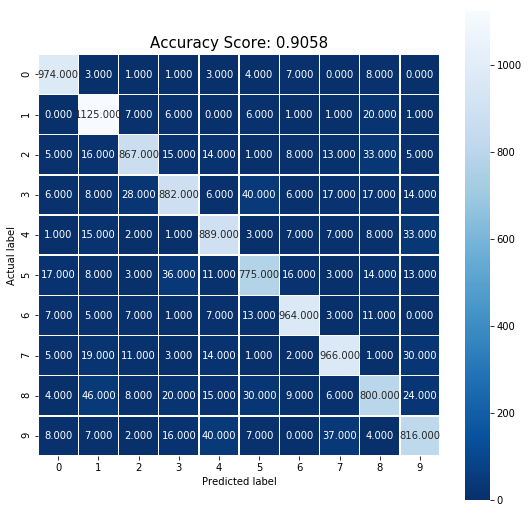

In [54]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Q.6. Evaluate the new classifier on the test set: how does it compare to the previous classifier? Discuss the speed / accuracy trade-off and in which case you'd prefer a very slight drop in model performance for a x-time speedup in training.

The score difference is negligeable compare to saving 50% of time in training the model 